
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the imdb movie database. I plan to ask two questions: Does the run time of a movie have any impact on the amount of revnue that a movie makes? And which genre makes the most revenue?

The columns of data available for analysis are id, imdb id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count, vote average, release year, budget and revenue adjusted. I will not be using all of this data to perfom my analysis, as we will see later. 

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
I am going to remove columns that are not relevant to the questions I am asking, for the sake of clarity and brevity. I will also be doing any data cleaning that is necessary. 

### General Properties

In [61]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [63]:
# I am dropping any columns that are unrelated to the questions in my analysis
df = df.drop(columns=['id','imdb_id', 'popularity', 'budget', 'cast', 'homepage','director', 'tagline', 'keywords', 'overview',
                     'production_companies', 'release_date', 'vote_count', 'vote_average', 'revenue',
                      'budget_adj'])
df.head(2)

,original_title,runtime,genres,release_year,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015,1.392446e+09
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015,3.481613e+08


In [64]:
# Checking that my drop was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   runtime         10866 non-null  int64  
 2   genres          10843 non-null  object 
 3   release_year    10866 non-null  int64  
 4   revenue_adj     10866 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 424.6+ KB


In [65]:
# verifying the number of columns
df.shape

(10866, 5)



### Data Cleaning 
I will first check that I do not have any duplicated lines and drop them if needed. I have noticed that the genre column has missing data and I will drop those lines if they don't appear that they will affect the analysis. The genre column is also split with a | demarcation. I will remove these and split the info into separate rows. 

Additionally, there are several films that have a zero in the adjusted revenue column. I will need to drop these so that I can get a more accurate view of the impact that runtime has on adjusted revenue.


In [66]:
# Checking for duplicates
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [67]:
# Dropping the rows with blanks in the genre column
df.dropna(how='any', subset=['genres'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10843 non-null  object 
 1   runtime         10843 non-null  int64  
 2   genres          10843 non-null  object 
 3   release_year    10843 non-null  int64  
 4   revenue_adj     10843 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 508.3+ KB


In [68]:
# Checking for zeros in the revenue_adj column

print(np.count_nonzero(df==0))

6023


In [69]:
#Dropping rows that have a zero in the revenue_adj column. I used this website as reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df = df.replace(0, np.nan)
df = df.dropna(how='any', axis=0)
df = df.replace(np.nan, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  4850 non-null   object 
 1   runtime         4850 non-null   float64
 2   genres          4850 non-null   object 
 3   release_year    4850 non-null   int64  
 4   revenue_adj     4850 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 227.3+ KB


In [70]:
# Verifying that zeros were dropped

print(np.count_nonzero(df==0))

0


In [71]:
# Splitting genres into separate rows
df1 = genres_1.copy()
df1    

,original_title,runtime,genres,release_year,revenue_adj
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015,1.392446e+09
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015,3.481613e+08
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015,1.902723e+09
4,Furious 7,137.0,Action|Crime|Thriller,2015,1.385749e+09
...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,1966,2.266436e+08
10828,Torn Curtain,128.0,Mystery|Thriller,1966,8.733419e+07
10829,El Dorado,120.0,Action|Western,1966,4.030809e+07
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,1966,1.343603e+08


In [72]:
genres_1 = df[df['genres'].str.contains('|')]
genres_1

,original_title,runtime,genres,release_year,revenue_adj
0,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,2015,1.392446e+09
1,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,2015,3.481613e+08
2,Insurgent,119.0,Adventure|Science Fiction|Thriller,2015,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,2015,1.902723e+09
4,Furious 7,137.0,Action|Crime|Thriller,2015,1.385749e+09
...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,1966,2.266436e+08
10828,Torn Curtain,128.0,Mystery|Thriller,1966,8.733419e+07
10829,El Dorado,120.0,Action|Western,1966,4.030809e+07
10835,The Sand Pebbles,182.0,Action|Adventure|Drama|War|Romance,1966,1.343603e+08


In [73]:
split_columns = ['genres']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])
df1.tail()  

,original_title,runtime,genres,release_year,revenue_adj
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,1966,2.266436e+08
10828,Torn Curtain,128.0,Mystery,1966,8.733419e+07
10829,El Dorado,120.0,Action,1966,4.030809e+07
10835,The Sand Pebbles,182.0,Action,1966,1.343603e+08
10848,Fantastic Voyage,100.0,Adventure,1966,8.061618e+07


In [74]:
# Creating append to add the new info into the original dataframe
new_rows = df1.append(df1)
new_rows

C:\Users\gnard\AppData\Local\Temp\ipykernel_30248\165064103.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df1)


,original_title,runtime,genres,release_year,revenue_adj
0,Jurassic World,124.0,Action,2015,1.392446e+09
1,Mad Max: Fury Road,120.0,Action,2015,3.481613e+08
2,Insurgent,119.0,Adventure,2015,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action,2015,1.902723e+09
4,Furious 7,137.0,Action,2015,1.385749e+09
...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,131.0,Drama,1966,2.266436e+08
10828,Torn Curtain,128.0,Mystery,1966,8.733419e+07
10829,El Dorado,120.0,Action,1966,4.030809e+07
10835,The Sand Pebbles,182.0,Action,1966,1.343603e+08


In [75]:
# Dropping copy and adding into dataframe
df.drop(genres_1.index, inplace=True)
df = df1.append(new_rows, ignore_index=True)

C:\Users\gnard\AppData\Local\Temp\ipykernel_30248\2402440819.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(new_rows, ignore_index=True)


In [76]:
df[df['genres'].str.contains('|')]

,original_title,runtime,genres,release_year,revenue_adj
0,Jurassic World,124.0,Action,2015,1.392446e+09
1,Mad Max: Fury Road,120.0,Action,2015,3.481613e+08
2,Insurgent,119.0,Adventure,2015,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action,2015,1.902723e+09
4,Furious 7,137.0,Action,2015,1.385749e+09
...,...,...,...,...,...
14545,Who's Afraid of Virginia Woolf?,131.0,Drama,1966,2.266436e+08
14546,Torn Curtain,128.0,Mystery,1966,8.733419e+07
14547,El Dorado,120.0,Action,1966,4.030809e+07
14548,The Sand Pebbles,182.0,Action,1966,1.343603e+08


In [36]:
# Verifying that it was successfully added to dataframe
df.tail(2)

,original_title,runtime,genres,release_year,revenue_adj
14548,The Sand Pebbles,182.0,Action,1966,1.343603e+08
14549,Fantastic Voyage,100.0,Adventure,1966,8.061618e+07


# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Does runtime have an effect on revenue?

In [77]:
# Using describe to find out the statisical info for the dataframe
df.describe()

,runtime,release_year,revenue_adj
count,14550.000000,14550.000000,1.455000e+04
mean,107.964742,2000.921649,1.150774e+08
std,21.111396,11.568397,1.988282e+08
min,15.000000,1960.000000,2.370705e+00
25%,95.000000,1994.000000,1.046155e+07
50%,104.000000,2004.000000,4.392749e+07
75%,117.000000,2010.000000,1.316482e+08
max,705.000000,2015.000000,2.827124e+09


In [78]:
# Finding the adjusted runtime mean as a control for comparison against my adjusted revenue categories
df.runtime.mean()

107.96474226804123

In [79]:
# Creating visualization
median = df['runtime'].median()
shorter = df.query('runtime < {}'.format(median))
longer = df.query('runtime >= {}'.format(median))

mean_revenue_short = shorter['revenue_adj'].mean()
mean_revenue_long = longer['revenue_adj'].mean()

Text(0, 0.5, 'Adjusted Revenue')

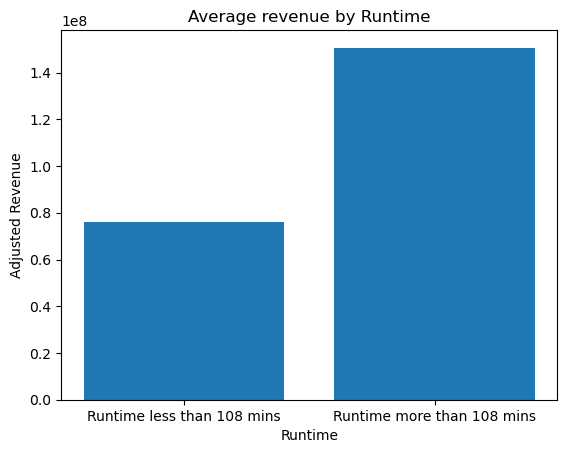

In [41]:
locations = [1,2]
heights = [mean_revenue_short, mean_revenue_long]
labels = 'Runtime less than 108 mins', 'Runtime more than 108 mins'
plt.bar(locations, heights, tick_label=labels)
plt.title('Average revenue by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Adjusted Revenue')


### Research Question 2  Does Genre impact revenue?

In [80]:
# Finding the unique genres of the dataframe
df.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror',
       'Documentary', 'Music', 'TV Movie'], dtype=object)

In [81]:
# Dropping TV Movie as a genre since the revneue would be impacted by its format
df[df['genres'].str.contains('TV Movie')==False]


,original_title,runtime,genres,release_year,revenue_adj
0,Jurassic World,124.0,Action,2015,1.392446e+09
1,Mad Max: Fury Road,120.0,Action,2015,3.481613e+08
2,Insurgent,119.0,Adventure,2015,2.716190e+08
3,Star Wars: The Force Awakens,136.0,Action,2015,1.902723e+09
4,Furious 7,137.0,Action,2015,1.385749e+09
...,...,...,...,...,...
14545,Who's Afraid of Virginia Woolf?,131.0,Drama,1966,2.266436e+08
14546,Torn Curtain,128.0,Mystery,1966,8.733419e+07
14547,El Dorado,120.0,Action,1966,4.030809e+07
14548,The Sand Pebbles,182.0,Action,1966,1.343603e+08


In [82]:
# Filtering each genre to determine average adjusted revenue
action = df[df['genres'].str.contains('Action')]
adventure = df[df['genres'].str.contains('Adventure')]
western = df[df['genres'].str.contains('Western')]
sci_fi = df[df['genres'].str.contains('Science Fiction')]
drama = df[df['genres'].str.contains('Drama')]
family = df[df['genres'].str.contains('Family')]
comedy = df[df['genres'].str.contains('Comedy')]
crime = df[df['genres'].str.contains('Crime')]
romance = df[df['genres'].str.contains('Romance')]
war = df[df['genres'].str.contains('War')]
mystery = df[df['genres'].str.contains('Mystery')]
thriller = df[df['genres'].str.contains('Thriller')]
fantasy = df[df['genres'].str.contains('Fantasy')]
history = df[df['genres'].str.contains('History')]
animation = df[df['genres'].str.contains('Animation')]
horror = df[df['genres'].str.contains('Horror')]
documentary = df[df['genres'].str.contains('Documentary')]
music = df[df['genres'].str.contains('Music')]

In [83]:
# Finding mean adjusted revenue of each genre
action_mean = action.revenue_adj.mean()
adventure_mean = adventure.revenue_adj.mean()
western_mean = western.revenue_adj.mean()
sci_fi_mean = sci_fi.revenue_adj.mean()
drama_mean = drama.revenue_adj.mean()
family_mean = family.revenue_adj.mean()
comedy_mean = comedy.revenue_adj.mean()
crime_mean = crime.revenue_adj.mean()
romance_mean = romance.revenue_adj.mean()
war_mean = war.revenue_adj.mean()
mystery_mean = mystery.revenue_adj.mean()
thriller_mean = thriller.revenue_adj.mean()
fantasy_mean = fantasy.revenue_adj.mean()
history_mean = history.revenue_adj.mean()
animation_mean = animation.revenue_adj.mean()
horror_mean = horror.revenue_adj.mean()
documentary_mean = documentary.revenue_adj.mean()
music_mean = music.revenue_adj.mean()

In [107]:
# creating a series to hold my info for my visualization. I used pythontic.pandas/series-plotting/bar%20chart as reference
series_mean = pd.Series([action_mean, adventure_mean, western_mean, sci_fi_mean, drama_mean, family_mean, comedy_mean, crime_mean,romance_mean, war_mean, mystery_mean, thriller_mean, fantasy_mean, history_mean, animation_mean, horror_mean, documentary_mean, music_mean],
                        index = ('Action', 'Adventure', 'Western', 'Science Fiction', 'Drama', 'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery', 'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Documentary', 'Music'));
series_mean

Action             1.426376e+08
Adventure          2.764585e+08
Western            9.461478e+07
Science Fiction    2.067658e+08
Drama              7.587174e+07
Family             2.270164e+08
Comedy             8.475980e+07
Crime              8.604049e+07
Romance            1.045478e+08
War                1.307201e+08
Mystery            7.217042e+07
Thriller           7.641153e+07
Fantasy            1.656752e+08
History            1.369488e+08
Animation          2.576326e+08
Horror             6.828551e+07
Documentary        1.055516e+07
Music              1.002081e+08
dtype: float64

### Creating visualization
I have created a bar chart showing the adjusted revenue of each genre

<AxesSubplot:>

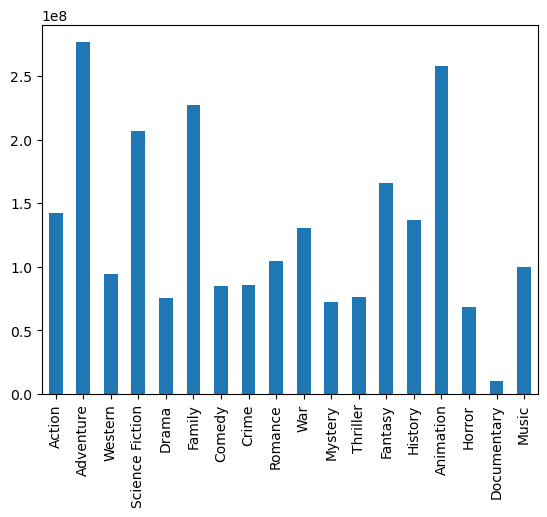

In [108]:
series_mean.plot.bar()

<a id='conclusions'></a>
## Conclusions

My findings show that both runtime and genre could have an influence on revenue. I would need to conduct more detailed analysis to make sure that there are not outside factors influencing the analysis. There are a number of circumstances that could impact my conclusion such as a film having mulitiple genres or if there has been an uptick of a particular genre being produced. Additionally, the reason that runtime and revenue appear to be correlated could actually be related to reasons such as long movies have bigger budgets and more effects, which in turn make them more attractive to audiences. In that case, the length is not the driving factor of why the movie brought in more revenue.